In [ ]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Import Cat vs Dog Dataset
---

In [ ]:
!mkdir ./tmp
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./tmp/cats_and_dogs_filtered.zip

In [ ]:
my_zip = './tmp/cats_and_dogs_filtered.zip'
new = zipfile.ZipFile(my_zip, 'r')
new.extractall('./tmp')
new.close()

In [ ]:
base_dir = './tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
train_cat_names = os.listdir(train_cats_dir)
train_dog_names = os.listdir(train_dogs_dir)
print(train_cat_names[:3])
print(train_dog_names[:3])

In [ ]:
print(f'training cat images : {len(os.listdir(train_cats_dir))}')
print(f'training dog images : {len(os.listdir(train_dogs_dir))}')

print(f'validation cat images : {len(os.listdir(val_cats_dir))}')
print(f'validation dog images : {len(os.listdir(val_dogs_dir))}')

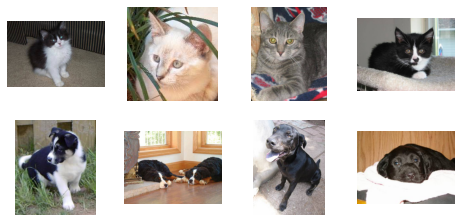

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4*2, 4*2)

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_names[:4] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_names[:4]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Create a convolutional binary classifier
---

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 20,
                                              class_mode = 'binary', 
                                              target_size = (150, 150))

val_gen =  test_datagen.flow_from_directory( val_dir,
                                                  batch_size  = 20,
                                                  class_mode  = 'binary', 
                                                  target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    steps_per_epoch=100,
    epochs=100,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 22s 212ms/step - loss: 0.7421 - accuracy: 0.4965 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6908 - accuracy: 0.5160 - val_loss: 0.6916 - val_accuracy: 0.5470
Epoch 3/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6878 - accuracy: 0.5385 - val_loss: 0.6825 - val_accuracy: 0.5880
Epoch 4/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.6799 - val_accuracy: 0.5560
Epoch 5/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6857 - accuracy: 0.5720 - val_loss: 0.6661 - val_accuracy: 0.5860
Epoch 6/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6764 - accuracy: 0.5855 - val_loss: 0.6510 - val_accuracy: 0.6180
Epoch 7/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6687 - accuracy: 0.5945 - val_loss: 0.7040 -

# Test with new images
---

In [ ]:
# show image
def imshow(image, title=None):
  plt.imshow(image)
  plt.axis(False)
  if title:
    plt.title(title)

[0.]
/content/sticker.webp is a cat!


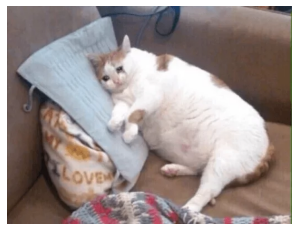

In [ ]:
path='/content/sticker.webp'
imshow(image.load_img(path))
img = image.load_img(path, target_size=(150, 150))
img = image.img_to_array(img)
img = tf.expand_dims(img, 0)
pred = model.predict(img)
print(pred[0])

if pred[0]>0.:
  print(f"{path} is a dog!")
  
else:
  print(f"{path} is a cat!")

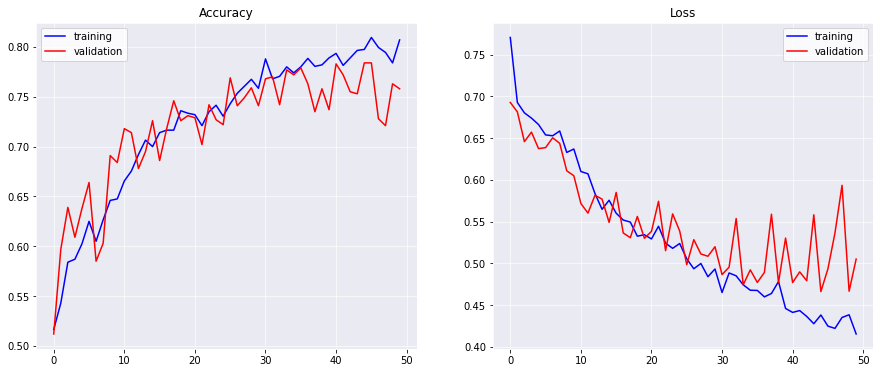

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()

[2.5228548e-32]
/content/koc.jpeg is a dog!


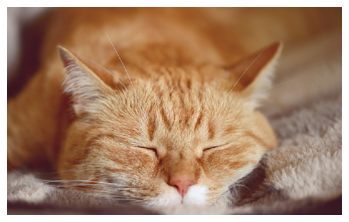

In [ ]:
# Load model from file
model = tf.keras.models.load_model('cat_dog_model_v2.h5')
path='/content/koc.jpeg'
imshow(image.load_img(path))
img = image.load_img(path, target_size=(150, 150))
img = image.img_to_array(img)
img = tf.expand_dims(img, 0)
pred = model.predict(img)
print(pred[0])

if pred[0]>0.:
  print(f"{path} is a dog!")
  
else:
  print(f"{path} is a cat!")
